# Capstone Three: Data Wrangling + EDA + Preliminary Modeling

## Post-Hurricane Building Damage Image Classification

### Part 1. Import dataset and generate features

In [1]:
# Import packages

import pandas as pd
import numpy as np
from skimage import io
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import seaborn as sns

In [2]:
# Prepare to load training set images

train_data = []
train_labels = []
train_path = []
train_lat = []
train_long = []
train_filesize = []

train_folder_damage = 'Post-hurricane/train_another/damage'
class_id_damage = 1

train_folder_no_damage = 'Post-hurricane/train_another/no_damage'
class_id_no_damage = 0

In [3]:
# Loop through folders to load images, extract filename, labels, lat/long, etc

# damage images
for file in os.listdir(train_folder_damage):
    image_path = os.path.join(train_folder_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    train_data.append(image)
    train_labels.append(class_id_damage)
    train_path.append(filename[0])
    latlong = filename[0].split('_')
    train_long.append(float(latlong[0]))
    train_lat.append(float(latlong[1]))
    train_filesize.append(size)
    

# no_damage images
for file in os.listdir(train_folder_no_damage):
    image_path = os.path.join(train_folder_no_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    train_data.append(image)
    train_labels.append(class_id_no_damage)
    train_path.append(filename[0])
    latlong = filename[0].split('_')
    train_long.append(float(latlong[0]))
    train_lat.append(float(latlong[1]))
    train_filesize.append(size)

In [4]:
# extract additional features from raw pixels

avg_pixel = []
min_pixel = []
max_pixel = []
std_pixel = []
med_pixel = []

for img in train_data:
    avg_pixel.append(np.average(img))
    min_pixel.append(np.amin(img))
    max_pixel.append(np.amax(img))
    std_pixel.append(np.std(img))
    med_pixel.append(np.median(img))

In [5]:
# create training dataframe, without raw pixel data

train_df = pd.DataFrame.from_dict({'file':train_path, 'class':train_labels, 'latitude':train_lat, 'longitude':train_long, 'file size':train_filesize, 'avg pixel':avg_pixel, 'min pixel':min_pixel, 'max pixel':max_pixel, 'std pixel':std_pixel, 'median pixel':med_pixel})

In [6]:
# Repeat for test set
# Prepare to load test set images

test_data = []
test_labels = []
test_path = []
test_lat = []
test_long = []
test_filesize = []

test_folder_damage = 'Post-hurricane/test_another/damage'
class_id_damage = 1

test_folder_no_damage = 'Post-hurricane/test_another/no_damage'
class_id_no_damage = 0

In [7]:
# Loop through folders to load test images

# damage images
for file in os.listdir(test_folder_damage):
    image_path = os.path.join(test_folder_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    test_data.append(image)
    test_labels.append(class_id_damage)
    test_path.append(filename[0])
    latlong = filename[0].split('_')
    test_long.append(float(latlong[0]))
    test_lat.append(float(latlong[1]))
    test_filesize.append(size)
    

# no_damage images
for file in os.listdir(test_folder_no_damage):
    image_path = os.path.join(test_folder_no_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    test_data.append(image)
    test_labels.append(class_id_no_damage)
    test_path.append(filename[0])
    latlong = filename[0].split('_')
    test_long.append(float(latlong[0]))
    test_lat.append(float(latlong[1]))
    test_filesize.append(size)
    
# get features from raw pixels

avg_pixel = []
min_pixel = []
max_pixel = []
std_pixel = []
med_pixel = []

for img in test_data:
    avg_pixel.append(np.average(img))
    min_pixel.append(np.amin(img))
    max_pixel.append(np.amax(img))
    std_pixel.append(np.std(img))
    med_pixel.append(np.median(img))
    
# create dataframe

test_df = pd.DataFrame.from_dict({'file':test_path, 'class':test_labels, 'latitude':test_lat, 'longitude':test_long, 'file size':test_filesize, 'avg pixel':avg_pixel, 'min pixel':min_pixel, 'max pixel':max_pixel, 'std pixel':std_pixel, 'median pixel':med_pixel})

### Part 2. Explore dataset

The training dataframe includes 10,000 images labeled by damage class where 1 represents damage and 0 represents no damage. Several other features were extracted from the images including the latitude and longitude from the file name, as well as file size, and some descriptive statistics based on raw pixel data.

In [8]:
train_df.head()

,file,class,latitude,longitude,file size,avg pixel,min pixel,max pixel,std pixel,median pixel
0,-95.63609699999999_29.843807,1,29.843807,-95.636097,2629,82.093910,8.0,252.0,31.077665,75.0
1,-95.564464_29.760775,1,29.760775,-95.564464,2303,77.315224,0.0,255.0,22.579866,75.0
2,-95.634153_29.848823,1,29.848823,-95.634153,2368,85.464722,29.0,203.0,25.438354,82.0
3,-95.55676600000001_29.771306,1,29.771306,-95.556766,2512,73.539795,10.0,218.0,25.875641,69.0
4,-95.626439_29.859842999999998,1,29.859843,-95.626439,2403,70.395653,21.0,156.0,17.914368,69.0


In [9]:
train_df.describe()

,class,latitude,longitude,file size,avg pixel,min pixel,max pixel,std pixel,median pixel
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500000,29.711999,-95.526672,2762.533300,87.787732,10.183500,224.760600,30.045078,85.097450
std,0.500025,0.379762,0.657977,484.313286,17.587444,10.213856,32.752596,8.427760,18.400539
min,0.000000,28.363774,-97.001979,943.000000,19.122946,0.000000,85.000000,9.264667,15.000000
25%,0.000000,29.757811,-95.640076,2413.000000,77.439331,0.000000,207.000000,24.151485,75.000000
50%,0.500000,29.831086,-95.626598,2743.000000,85.260040,8.000000,234.000000,28.852252,82.000000
75%,1.000000,29.858590,-95.233276,3080.000000,94.686468,17.000000,255.000000,34.046926,92.000000
max,1.000000,30.895018,-93.559640,5647.000000,215.625610,162.000000,255.000000,75.289078,232.000000


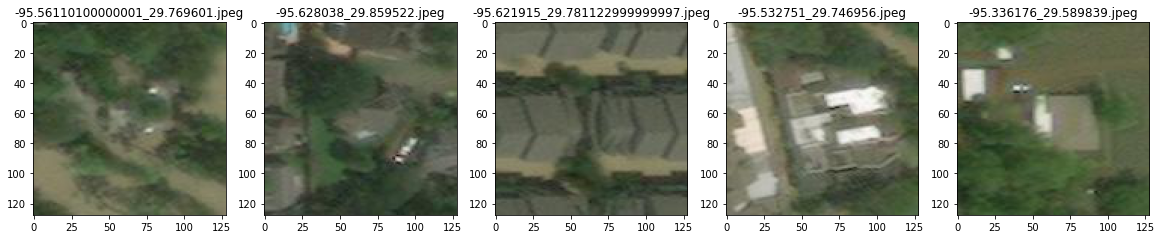

In [10]:
# Print 5 random images from training damage set

plt.figure(figsize=(20,20))

img_folder = 'Post-hurricane/train_another/damage'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path = os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

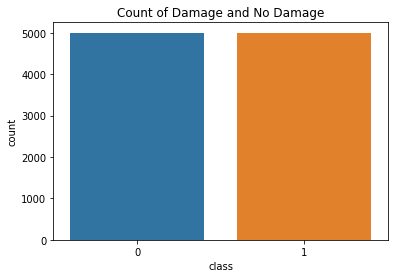

In [11]:
# plot training set class distribution

sns.countplot(x='class', data=train_df)
plt.title("Count of Damage and No Damage")
plt.show()

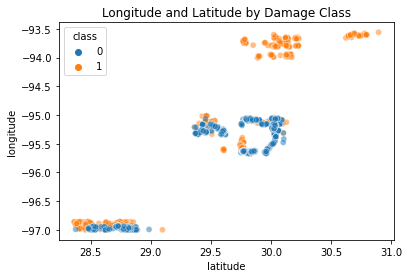

In [12]:
# plot some of the features: longitude and latitude

_ = sns.scatterplot(x='latitude', y='longitude', data=train_df, hue='class', alpha=0.5)
_ = plt.title('Longitude and Latitude by Damage Class')
plt.show()

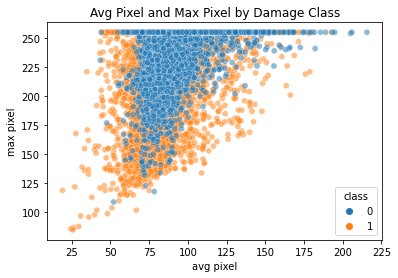

In [13]:
# plot some of the features: average and max pixel

_ = sns.scatterplot(x='avg pixel', y='max pixel', data=train_df, hue='class', alpha=0.5)
_ = plt.title('Avg Pixel and Max Pixel by Damage Class')
plt.show()

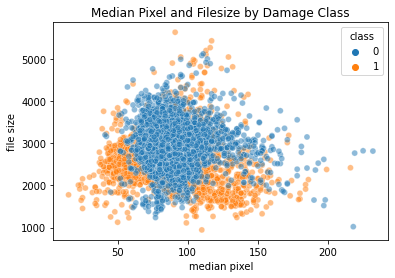

In [14]:
# plot some of the features: median pixel by file size

_ = sns.scatterplot(x='median pixel', y='file size', data=train_df, hue='class', alpha=0.5)
_ = plt.title('Median Pixel and Filesize by Damage Class')
plt.show()

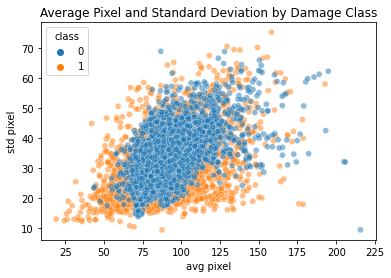

In [15]:
# plot some of the features: average pixel by standard deviation

_ = sns.scatterplot(x='avg pixel', y='std pixel', data=train_df, hue='class', alpha=0.5)
_ = plt.title('Average Pixel and Standard Deviation by Damage Class')
plt.show()

In [16]:
test_df.describe()

,class,latitude,longitude,file size,avg pixel,min pixel,max pixel,std pixel,median pixel
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.00000,9000.000000,9000.000000,9000.000000
mean,0.888889,29.717114,-95.457869,2570.191667,85.440578,13.59100,216.152444,28.047445,82.895611
std,0.314287,0.404206,0.751128,425.628402,18.290089,10.66709,37.096237,8.548947,19.350691
min,0.000000,28.363781,-97.001948,1016.000000,13.880676,0.00000,70.000000,7.424131,9.000000
25%,1.000000,29.757398,-95.637082,2337.000000,74.184294,3.00000,190.000000,22.032193,71.000000
50%,1.000000,29.815798,-95.593778,2478.000000,82.332600,14.00000,225.000000,26.027967,80.000000
75%,1.000000,29.861814,-95.160405,2746.000000,93.497459,21.00000,253.000000,32.171903,91.000000
max,1.000000,30.994013,-93.528502,5484.000000,195.810074,120.00000,255.000000,81.127312,216.000000


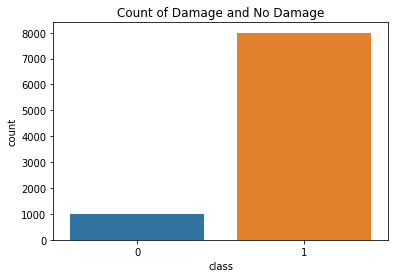

In [17]:
# plot test set class distribution

sns.countplot(x='class', data=test_df)
plt.title("Count of Damage and No Damage")
plt.show()

Note that the test set is unbalanced (1000 no damage images and 8000 damage images)

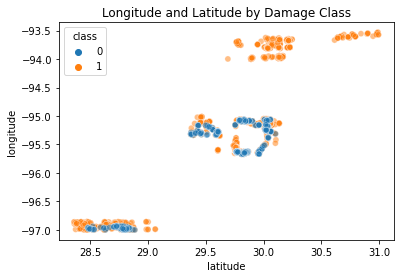

In [18]:
# plot some of the features: longitude and latitude

_ = sns.scatterplot(x='latitude', y='longitude', data=test_df, hue='class', alpha=0.5)
_ = plt.title('Longitude and Latitude by Damage Class')
plt.show()

### Part 3. Try fitting simple classification models

The following steps include fitting several basic classification models to the train set before introducing the raw pixel data. Models were trained iteratively, adding additional features then tested on the test set to explore impact on classification results.

#### Logistic Regression

In [19]:
# set up logistic regression model - Lat/Long only

from sklearn.linear_model import LogisticRegression

X_train = train_df[['latitude', 'longitude']]
X_test = test_df[['latitude', 'longitude']]

y_train = np.ravel(train_df[['class']])
y_test = np.ravel(test_df[['class']])

lr_latlong = LogisticRegression()

In [20]:
# train model on data

lr_latlong.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# predict on test set

y_pred = lr_latlong.predict(X_test)

In [22]:
# Calculate metrics to evaluate method 

from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

test_score = lr_latlong.score(X_test, y_test)
train_score = lr_latlong.score(X_train, y_train)

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.27      0.17      1000
           1       0.89      0.76      0.82      8000

    accuracy                           0.71      9000
   macro avg       0.51      0.52      0.50      9000
weighted avg       0.81      0.71      0.75      9000



In [23]:
# set up metrics df
metrics = pd.DataFrame({'model': ['lr_latlong'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783


In [24]:
# set up logistic regression model - Lat/Long, filesize

X_train = train_df[['latitude', 'longitude', 'file size']]
X_test = test_df[['latitude', 'longitude', 'file size']]

y_train = np.ravel(train_df[['class']])
y_test = np.ravel(test_df[['class']])

lr_fsize = LogisticRegression()

# train model on data

lr_fsize.fit(X_train, y_train)

# predict on test set

y_pred = lr_fsize.predict(X_test)

# Calculate metrics to evaluate method 

test_score = lr_fsize.score(X_test, y_test)
train_score = lr_fsize.score(X_train, y_train)

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.36      0.82      0.50      1000
           1       0.97      0.82      0.89      8000

    accuracy                           0.82      9000
   macro avg       0.67      0.82      0.70      9000
weighted avg       0.91      0.82      0.85      9000



In [25]:
# Add to metrics df

metrics_new = pd.DataFrame({'model': ['lr_fsize'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817


In [26]:
# set up logistic regression model - Lat/Long, filesize, avg pixel

X_train = train_df[['latitude', 'longitude', 'file size', 'avg pixel']]
X_test = test_df[['latitude', 'longitude', 'file size', 'avg pixel']]

y_train = np.ravel(train_df[['class']])
y_test = np.ravel(test_df[['class']])

lr_avgpix = LogisticRegression()

# train model on data

lr_avgpix.fit(X_train, y_train)

# predict on test set

y_pred = lr_avgpix.predict(X_test)

# Calculate metrics to evaluate method 

test_score = lr_avgpix.score(X_test, y_test)
train_score = lr_avgpix.score(X_train, y_train)

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.36      0.82      0.50      1000
           1       0.97      0.82      0.89      8000

    accuracy                           0.82      9000
   macro avg       0.67      0.82      0.70      9000
weighted avg       0.91      0.82      0.85      9000



In [27]:
# Add to metrics df

metrics_new = pd.DataFrame({'model': ['lr_avgpixel'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817
2,lr_avgpixel,0.818889,0.8151,0.973958,0.818125,0.889266


In [28]:
# set up logistic regression model - Lat/Long, filesize, avg pixel, median pixel

X_train = train_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel']]
X_test = test_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel']]

y_train = np.ravel(train_df[['class']])
y_test = np.ravel(test_df[['class']])

lr_medpix = LogisticRegression()

# train model on data

lr_medpix.fit(X_train, y_train)

# predict on test set

y_pred = lr_medpix.predict(X_test)

# Calculate metrics to evaluate method 

test_score = lr_medpix.score(X_test, y_test)
train_score = lr_medpix.score(X_train, y_train)

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.38      0.81      0.52      1000
           1       0.97      0.83      0.90      8000

    accuracy                           0.83      9000
   macro avg       0.68      0.82      0.71      9000
weighted avg       0.91      0.83      0.86      9000



In [29]:
# Add to metrics df

metrics_new = pd.DataFrame({'model': ['lr_medpixel'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817
2,lr_avgpixel,0.818889,0.8151,0.973958,0.818125,0.889266
3,lr_medpixel,0.831222,0.8252,0.972721,0.833500,0.897745


In [30]:
# set up logistic regression model - Lat/Long, filesize, avg pixel, med pixel, std pixel

X_train = train_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel', 'std pixel']]
X_test = test_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel', 'std pixel']]

y_train = np.ravel(train_df[['class']])
y_test = np.ravel(test_df[['class']])

lr_stdpix = LogisticRegression()

# train model on data

lr_stdpix.fit(X_train, y_train)

# predict on test set

y_pred = lr_stdpix.predict(X_test)

# Calculate metrics to evaluate method 

test_score = lr_stdpix.score(X_test, y_test)
train_score = lr_stdpix.score(X_train, y_train)

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.37      0.82      0.51      1000
           1       0.97      0.83      0.89      8000

    accuracy                           0.83      9000
   macro avg       0.67      0.82      0.70      9000
weighted avg       0.91      0.83      0.85      9000



In [31]:
# Add to metrics df

metrics_new = pd.DataFrame({'model': ['lr_stdpixel'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817
2,lr_avgpixel,0.818889,0.8151,0.973958,0.818125,0.889266
3,lr_medpixel,0.831222,0.8252,0.972721,0.833500,0.897745
4,lr_stdpixel,0.826333,0.8248,0.972961,0.827625,0.894428


In [32]:
# set up logistic regression model - all features

X_train = train_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel', 'std pixel', 'min pixel', 'max pixel']]
X_test = test_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel', 'std pixel', 'min pixel', 'max pixel']]

y_train = np.ravel(train_df[['class']])
y_test = np.ravel(test_df[['class']])

lr_allpix = LogisticRegression()

# train model on data

lr_allpix.fit(X_train, y_train)

# predict on test set

y_pred = lr_allpix.predict(X_test)

# Calculate metrics to evaluate method 

test_score = lr_allpix.score(X_test, y_test)
train_score = lr_allpix.score(X_train, y_train)

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.35      0.86      0.49      1000
           1       0.98      0.80      0.88      8000

    accuracy                           0.80      9000
   macro avg       0.66      0.83      0.69      9000
weighted avg       0.91      0.80      0.84      9000



In [33]:
# Add to metrics df

metrics_new = pd.DataFrame({'model': ['lr_allpixel'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817
2,lr_avgpixel,0.818889,0.8151,0.973958,0.818125,0.889266
3,lr_medpixel,0.831222,0.8252,0.972721,0.833500,0.897745
4,lr_stdpixel,0.826333,0.8248,0.972961,0.827625,0.894428
5,lr_allpixel,0.804667,0.8210,0.978094,0.798125,0.878992


In general, this logistic regression classifier works relatively well using these simple features extracted from the image dataset. Note the jump in accuracy and precision resulting from including the file size feature for model fitting. Building off of this, try tuning regularization strength hyperparameter.

In [34]:
# try tuning hyperparameters using best combination of features as identified by logistic regression above

X_train = train_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel', 'std pixel']]
X_test = test_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel', 'std pixel']]

y_train = np.ravel(train_df[['class']])
y_test = np.ravel(test_df[['class']])

# set up range of C values to try

C_range = [0.001, 0.01, 0.1, 1, 10]

C_val = []
test_score_list = []
train_score_list = []
f1_list = []
precision_list = []
recall_list = []

# loop through range and collect evaluation metrics

for c in C_range:
    lr = LogisticRegression(penalty='l2', C=c)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    C_val.append(c)
    test_score_list.append(lr.score(X_test, y_test))
    train_score_list.append(lr.score(X_train, y_train))

    f1_list.append(f1_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))

    
lr_hptune = pd.DataFrame({'C value': C_val, 'test accuracy': test_score_list, 'train accuracy': train_score_list, 'precision': precision_list, 'recall': recall_list, 'f1 score': f1_list})
lr_hptune

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

,C value,test accuracy,train accuracy,precision,recall,f1 score
0,0.001,0.827556,0.8258,0.973282,0.828750,0.895220
1,0.010,0.826556,0.8247,0.972969,0.827875,0.894577
2,0.100,0.826333,0.8249,0.972961,0.827625,0.894428
3,1.000,0.826333,0.8248,0.972961,0.827625,0.894428
4,10.000,0.826333,0.8248,0.972961,0.827625,0.894428


Smallest value of C (0.001) appears to have best performance

In [35]:
# add best model to metrics df

metrics_new = pd.DataFrame({'model': ['lr_hptune'], 'test accuracy': [lr_hptune['test accuracy'][0]], 'train accuracy': [lr_hptune['train accuracy'][0]], 'precision': [lr_hptune['precision'][0]], 'recall': [lr_hptune['recall'][0]], 'f1 score': [lr_hptune['f1 score'][0]]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817
2,lr_avgpixel,0.818889,0.8151,0.973958,0.818125,0.889266
3,lr_medpixel,0.831222,0.8252,0.972721,0.833500,0.897745
4,lr_stdpixel,0.826333,0.8248,0.972961,0.827625,0.894428
5,lr_allpixel,0.804667,0.8210,0.978094,0.798125,0.878992
6,lr_hptune,0.827556,0.8258,0.973282,0.828750,0.895220


#### Random Forest

In [36]:
# set up random forest classifier using best combination of features as identified by logistic regression above

from sklearn.ensemble import RandomForestClassifier

X_train = train_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel', 'std pixel']]
X_test = test_df[['latitude', 'longitude', 'file size', 'avg pixel', 'median pixel', 'std pixel']]

y_train = np.ravel(train_df[['class']])
y_test = np.ravel(test_df[['class']])

rf_stdpix = RandomForestClassifier()

# train model on data

rf_stdpix.fit(X_train, y_train)

# predict on test set

y_pred = rf_stdpix.predict(X_test)

# Calculate metrics to evaluate method 

test_score = rf_stdpix.score(X_test, y_test)
train_score = rf_stdpix.score(X_train, y_train)

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.58      0.94      0.72      1000
           1       0.99      0.92      0.95      8000

    accuracy                           0.92      9000
   macro avg       0.79      0.93      0.84      9000
weighted avg       0.95      0.92      0.93      9000



In [37]:
# Add to metrics df

metrics_new = pd.DataFrame({'model': ['rf_stdpixel'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817
2,lr_avgpixel,0.818889,0.8151,0.973958,0.818125,0.889266
3,lr_medpixel,0.831222,0.8252,0.972721,0.833500,0.897745
4,lr_stdpixel,0.826333,0.8248,0.972961,0.827625,0.894428
5,lr_allpixel,0.804667,0.8210,0.978094,0.798125,0.878992
6,lr_hptune,0.827556,0.8258,0.973282,0.828750,0.895220
7,rf_stdpixel,0.918444,0.9957,0.991610,0.916000,0.952307


Random forest classifier using defaults appears to be overfitting, try tuning hyperparameters

In [38]:
# try random forest classifier with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth': [2, 5, 10], 
    'criterion': ['gini', 'entropy']
}

CV_rf_stdpix = GridSearchCV(estimator=rf_stdpix, param_grid=param_grid, cv=5)
CV_rf_stdpix.fit(X_train, y_train)

CV_rf_stdpix.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}

In [39]:
rf_stdpix_GSCV = RandomForestClassifier(max_depth = 10, n_estimators = 50, criterion = 'entropy')

# train model on data

rf_stdpix_GSCV.fit(X_train, y_train)

# predict on test set

y_pred = rf_stdpix_GSCV.predict(X_test)

# Calculate metrics to evaluate method 

test_score = rf_stdpix_GSCV.score(X_test, y_test)
train_score = rf_stdpix_GSCV.score(X_train, y_train)

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.93      0.72      1000
           1       0.99      0.92      0.95      8000

    accuracy                           0.92      9000
   macro avg       0.79      0.92      0.84      9000
weighted avg       0.95      0.92      0.93      9000



In [40]:
# Add to metrics df

metrics_new = pd.DataFrame({'model': ['rf_stdpixel_GSCV'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817
2,lr_avgpixel,0.818889,0.8151,0.973958,0.818125,0.889266
3,lr_medpixel,0.831222,0.8252,0.972721,0.833500,0.897745
4,lr_stdpixel,0.826333,0.8248,0.972961,0.827625,0.894428
5,lr_allpixel,0.804667,0.8210,0.978094,0.798125,0.878992
6,lr_hptune,0.827556,0.8258,0.973282,0.828750,0.895220
7,rf_stdpixel,0.918444,0.9957,0.991610,0.916000,0.952307
8,rf_stdpixel_GSCV,0.919556,0.9586,0.990429,0.918375,0.953042


### Part 4. Add raw pixel data

In [41]:
# reshape, flatten pixel data and concat to train df
train_data = np.array(train_data, np.float32)
train_data = train_data.reshape(train_data.shape[0], -1)

train_data = pd.concat([train_df, pd.DataFrame(train_data)], axis=1)

In [42]:
train_data.shape

(10000, 49162)

In [43]:
# reshape, flatten pixel data and concat to test df
test_data = np.array(test_data, np.float32)
test_data = test_data.reshape(test_data.shape[0], -1)

test_data = pd.concat([test_df, pd.DataFrame(test_data)], axis=1)

In [44]:
test_data.shape

(9000, 49162)

In [45]:
# OPTIONAL: take sample for log regression, decrease computation time

train_data = train_data.sample(n=5000, random_state=12)
test_data = test_data.sample(n=200, random_state=12)

In [46]:
# set up variables

X_train = train_data.drop(['file', 'class'], axis=1)
X_test = test_data.drop(['file', 'class'], axis=1)

y_train = train_data['class']
y_test = test_data['class']

In [47]:
# fit and train model

from sklearn.linear_model import LogisticRegression
lr_rawpix = LogisticRegression()
lr_rawpix.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# predict on test set

y_pred = lr_rawpix.predict(X_test)

In [49]:
test_score = lr_rawpix.score(X_test, y_test)
print(test_score)

train_score = lr_rawpix.score(X_train, y_train)
print(train_score)

0.74
1.0


Logistic regression is overfitting on training set. This is probably due to the very large dimensionality of the training set. Need to reduce dimension, try using PCA.

In [50]:
# scaling data to prepare for PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# dimension reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [52]:
pca.n_components_

763

PCA reduced number of dimensions from over 49,000 to 763.

In [53]:
# train logistic regression again

lr_pca = LogisticRegression()
lr_pca.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# predict on test set

y_pred = lr_pca.predict(X_test)

In [55]:
test_score = lr_pca.score(X_test, y_test)
print(test_score)

train_score = lr_pca.score(X_train, y_train)
print(train_score)

0.795
0.8354


No longer overfitting as much.

In [56]:
# Calculate metrics to evaluate method 

f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [57]:
# Add to metrics df

metrics_new = pd.DataFrame({'model': ['lr_pca'], 'test accuracy': [test_score], 'train accuracy': [train_score], 'precision': [prec], 'recall': [recall], 'f1 score': [f1]})
metrics = pd.concat([metrics, metrics_new], ignore_index=True)

metrics

,model,test accuracy,train accuracy,precision,recall,f1 score
0,lr_latlong,0.706556,0.5079,0.892946,0.761125,0.821783
1,lr_fsize,0.821000,0.8156,0.972909,0.821500,0.890817
2,lr_avgpixel,0.818889,0.8151,0.973958,0.818125,0.889266
3,lr_medpixel,0.831222,0.8252,0.972721,0.833500,0.897745
4,lr_stdpixel,0.826333,0.8248,0.972961,0.827625,0.894428
5,lr_allpixel,0.804667,0.8210,0.978094,0.798125,0.878992
6,lr_hptune,0.827556,0.8258,0.973282,0.828750,0.895220
7,rf_stdpixel,0.918444,0.9957,0.991610,0.916000,0.952307
8,rf_stdpixel_GSCV,0.919556,0.9586,0.990429,0.918375,0.953042
9,lr_pca,0.795000,0.8354,0.972789,0.794444,0.874618
